<a href="https://colab.research.google.com/github/awhitehouse1/DS4002-Project-1/blob/main/Scripts/Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [ ]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('amazon_reviews.csv')

In [ ]:
# Drop unwanted columns
df = df.drop(columns=['score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'])

In [ ]:
# Pre-process the 'reviewText' column
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
# Create new column by applying pre-process function to 'reviewText'
df['cleaned_reviewText'] = df['reviewText'].apply(lambda x: preprocess_text(str(x)))

In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Apply sentiment analysis on the pre-processed 'cleaned_reviewText' column
df['sentiment_scores'] = df['cleaned_reviewText'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
# Extract the compound score as the overall sentiment score
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
# Display the first few rows of the processed DataFrame
print(df[['reviewerName', 'reviewText', 'cleaned_reviewText', 'compound_score']].head())

   reviewerName                                         reviewText  \
0           NaN                                         No issues.   
1          0mie  Purchased this for my device, it worked as adv...   
2           1K3  it works as expected. I should have sprung for...   
3           1m2  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  Bought it with Retail Packaging, arrived legit...   

                                  cleaned_reviewText  compound_score  
0                                             issues          0.0000  
1  purchased device worked advertised never much ...          0.0000  
2  works expected sprung higher capacity think ma...          0.4019  
3  think worked greathad diff bran gb card went s...          0.6486  
4  bought retail packaging arrived legit orange e...          0.8591  


In [ ]:
# Checking for correlation between compound score and overall rating
# Ensure 'overall' column is present in the dataframe and is numeric
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

In [ ]:
pip install matplotlib seaborn

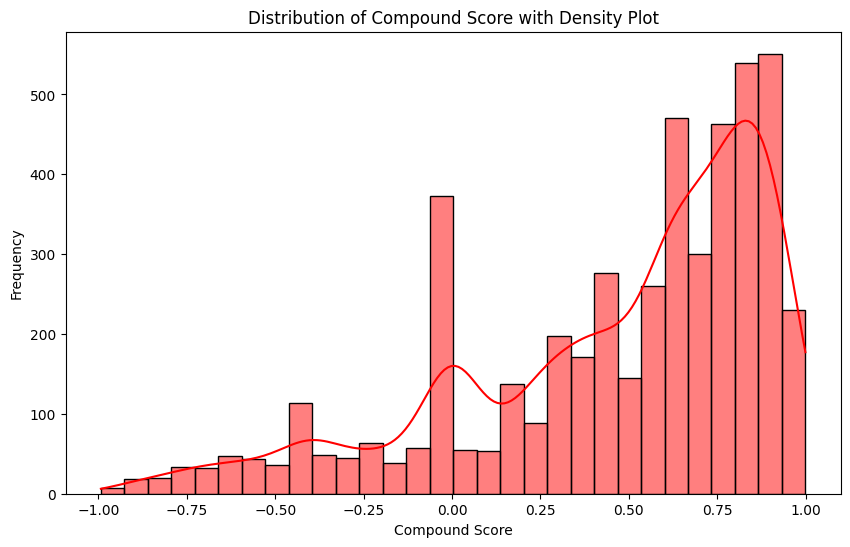

In [ ]:
# Visualizing distribution of compound scores
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the histogram with a density line for the compound score
sns.histplot(df['compound_score'], kde=True, bins=30, color='red', edgecolor='black')

# Add labels and title
plt.title('Distribution of Compound Score with Density Plot')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [ ]:
# Density plot shows a left skewed distribution with most of the compound scores falling between 0.50 and 1.00.
# This suggests that most of the reviews were positive.

In [ ]:
# Correlation between 'compound_score' and 'overall'
correlation = df['compound_score'].corr(df['overall'])

In [ ]:
print(f"The correlation between the compound score and the overall rating is: {correlation}")

The correlation between the compound score and the overall rating is: 0.3185488215615132


In [ ]:
# The correlation is 0.3185, which is weaker than what we assumed to be.

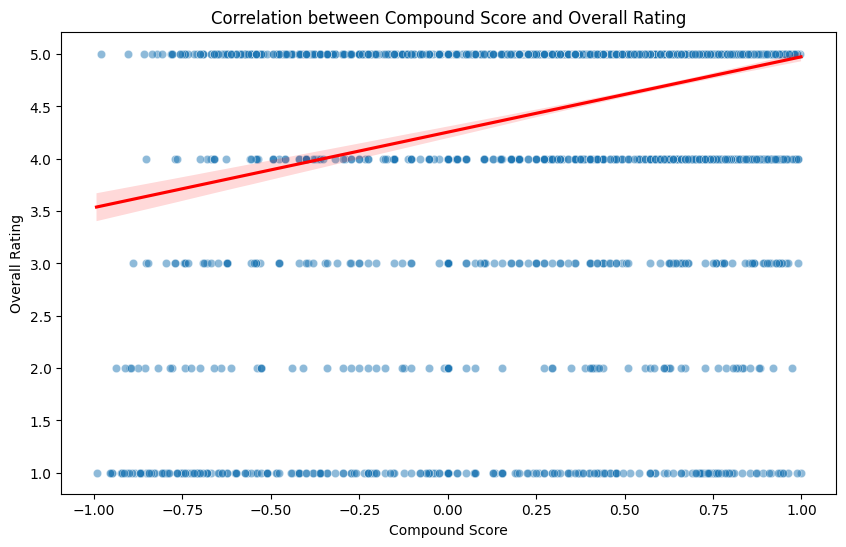

In [ ]:
# Plot the correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='compound_score', y='overall', data=df, alpha=0.5)

# Add a line of best fit
sns.regplot(x='compound_score', y='overall', data=df, scatter=False, color='red')

# Add labels and title
plt.title('Correlation between Compound Score and Overall Rating')
plt.xlabel('Compound Score')
plt.ylabel('Overall Rating')

plt.show()


In [ ]:
# Above graph does not make much sense because overall (rating) is not a continuous variable.
# Because the compound scores are evenly distributed among each of the ratings, it is hard to interpret
# this graph and visualize the correlation.

<ipython-input-24-220bd7270ce8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall', y='compound_score', data=df, palette= 'plasma')


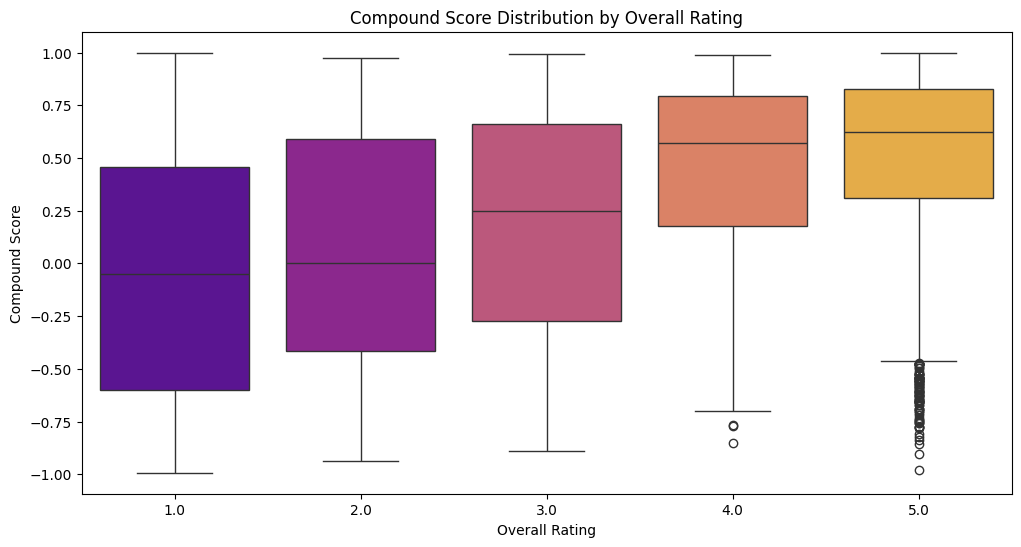

In [ ]:
# Boxplot of compound Scores by overall rating
# Set up the figure
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='overall', y='compound_score', data=df, palette= 'plasma')

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

plt.show()


In [ ]:
# On average, neutral compound scores (reviews) were given more to products with 1 and 2 star ratings.
# Median of the boxplots show that compound scores increase as overall ratings increase, which could indicate
# that products with higher ratings tend to have more positive reviews.
# However, there are outliers in the 4 and 5 star ratings with negative compound scores. This could be because of
# the difference in users' experiences of the product (defects, misuse, diverse user needs, etc) that can be
# explored further.

<ipython-input-26-7ac89ebc4ab5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='overall', y='compound_score', data=df, inner='box', palette='plasma')


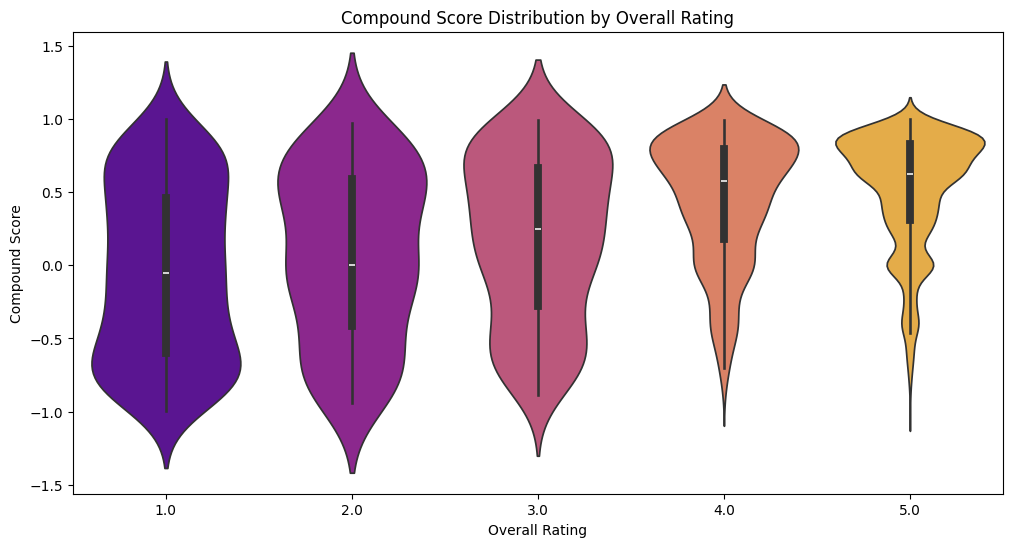

In [ ]:
# Violin Plot of compound scores across overall ratings
# Set up the figure
plt.figure(figsize=(12, 6))

# Create a violin plot
sns.violinplot(x='overall', y='compound_score', data=df, inner='box', palette='plasma')

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

plt.show()


In [ ]:
# Looking at the shapes of the violin plot, the 1 star ratings appear to have a fairly normal distribution
# of compound scores while 2 to 5 star ratings have skewed distributions of positive compound scores.
# Similar to the boxplots, compound scores seem to increase as ratings increase.
# We also see that there are outliers in 4 and 5 star ratings that are away from the rest of the distribution.

In [ ]:
pip install joypy matplotlib pandas

<Figure size 1200x800 with 0 Axes>

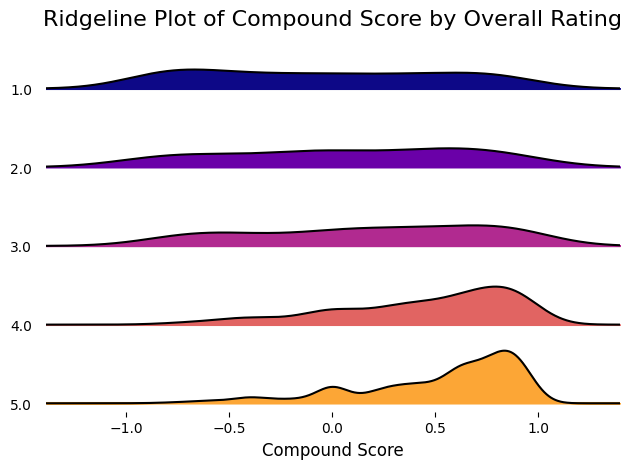

In [ ]:
# Ridgeline plot of compound Score by overall rating
import pandas as pd
import matplotlib.pyplot as plt
import joypy

# Create the ridgeline plot
plt.figure(figsize=(12, 8))
joypy.joyplot(df, by='overall', column='compound_score', colormap=plt.cm.plasma)

# Set labels and the title
plt.xlabel('Compound Score', fontsize=12)
plt.title('Ridgeline Plot of Compound Score by Overall Rating', fontsize=16)

plt.gca().set_yticks(range(len(df['overall'].unique())))
plt.gca().set_yticklabels(sorted(df['overall'].unique()), fontsize=12)
# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Compound scores of 1,2, and 3 star ratings seem to be evenly distributed, which is surprising because low
# product ratings are usually associated with low customer sentiment.
# Products with 4 and 5 stars have more positive compound scores, which is consistent with what we saw before.

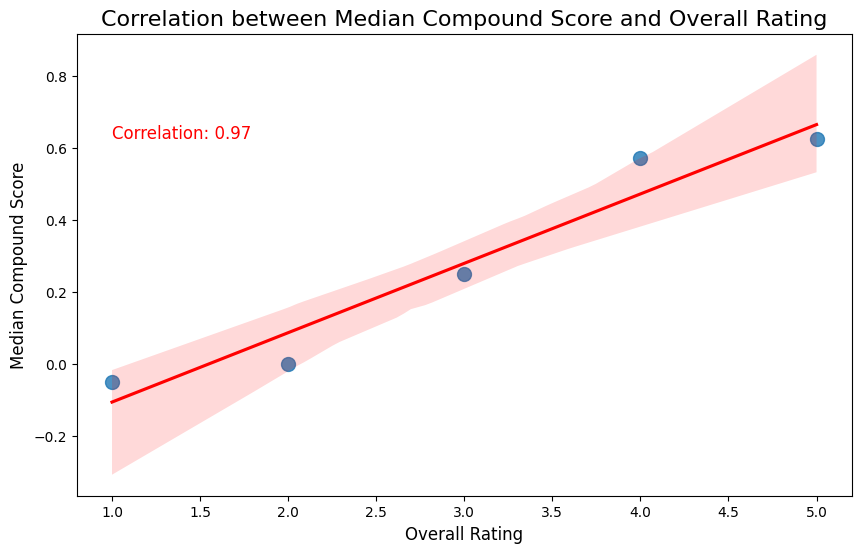

In [ ]:
# Median compound scores and overall rating
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate the median compound score for each overall rating
median_scores = df.groupby('overall')['compound_score'].median().reset_index()

# Calculate the correlation coefficient between overall rating and median compound score
correlation, _ = pearsonr(median_scores['overall'], median_scores['compound_score'])

# Create the scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='overall', y='compound_score', data=median_scores, scatter_kws={'s': 100}, line_kws={"color": "red"})

# Add correlation value to the plot
plt.text(x=median_scores['overall'].min(),
         y=median_scores['compound_score'].max(),
         s=f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Add labels and title
plt.title('Correlation between Median Compound Score and Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Median Compound Score', fontsize=12)

plt.show()


In [ ]:
# Graph above illustrates a stronge positive correlation between overall ratings and customer sentiment scores.
# Median is not influenced by outliers so this graph does not take into account variability of customer reviews.

In [ ]:
pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


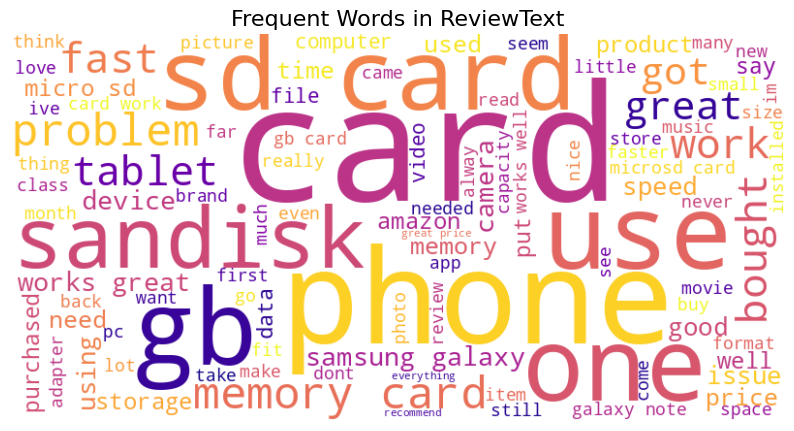

In [ ]:
# Word cloud of words in ReviewText
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string
all_reviews = ' '.join(df['reviewText'].dropna().astype(str))

# Pre-process the text: remove non-alphabetic characters, convert to lowercase, and remove stop words
processed_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews).lower()
processed_reviews = ' '.join([word for word in processed_reviews.split() if word not in stop_words])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,
                      colormap='plasma').generate(processed_reviews)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Words in ReviewText', fontsize=16)
plt.show()


In [58]:
# Reviews closest to the median compound score for each overall rating
from collections import Counter

# Function to get top 10 words for a given list of reviews
def get_top_words(reviews):
    # Flatten the list of strings into a single list of words
    all_words = ' '.join(reviews).split()
    # Count the word frequencies
    word_freq = Counter(all_words)
    # Get the 10 most common words
    return word_freq.most_common(10)

# Get the top 10 words for each overall rating
top_words_by_rating = {}
for rating in sorted(df['overall'].unique()):
    reviews = df[df['overall'] == rating]['cleaned_reviewText'].dropna()
    top_words_by_rating[rating] = get_top_words(reviews)

print("Top 10 most frequent words for each overall rating:")
for rating, words in top_words_by_rating.items():
    print(f"Rating {rating}: {words}")


Top 10 most frequent words for each overall rating:
Rating 1.0: [('card', 604), ('sandisk', 202), ('phone', 168), ('gb', 138), ('one', 106), ('cards', 106), ('would', 95), ('sd', 93), ('months', 81), ('format', 77)]
Rating 2.0: [('card', 218), ('phone', 70), ('gb', 69), ('sandisk', 60), ('cards', 39), ('would', 37), ('class', 34), ('mbs', 33), ('speed', 33), ('memory', 31)]
Rating 3.0: [('card', 229), ('gb', 77), ('phone', 75), ('sandisk', 67), ('one', 48), ('cards', 43), ('would', 39), ('use', 38), ('works', 35), ('sd', 35)]
Rating 4.0: [('card', 575), ('phone', 210), ('gb', 184), ('works', 181), ('sd', 169), ('memory', 146), ('one', 142), ('good', 135), ('sandisk', 133), ('great', 131)]
Rating 5.0: [('card', 2977), ('works', 1307), ('gb', 1257), ('great', 1257), ('phone', 1162), ('memory', 1078), ('sd', 878), ('use', 868), ('sandisk', 824), ('galaxy', 779)]


In [ ]:
# Most frequent words do not carry a lot of sentiment, thus we should get rid of these words like card,
# phone, etc. in pre-processing phase

In [ ]:
# Preprocess data again to remove words
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Define additional non-sentimental words to remove
non_sentimental_words = {'card', 'phone', 'gb', 'sandisk', 'cards', 'sd', 'memory', 'one', 'class',
                         'mbs', 'speed', 'galaxy', 'replacement', 'format', 'computer', 'levelbenchmarks',
                         'trypictures', 'openingediting', 'insamsung', 'lists', 'caching' ,'samsung'}

# Define the standard stop words and include negations
stop_words = set(stopwords.words('english')) - {'not', 'no', 'never'}
# Combine stop words with non-sentimental words
custom_stop_words = stop_words.union(non_sentimental_words)

# Function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    words = re.sub(r'[^a-zA-Z\s]', '', text).lower().split()
    # Remove stop words including non-sentimental words but keep negations
    words = [word for word in words if word not in custom_stop_words]
    return ' '.join(words)  # Joining words back into a single string

# Apply preprocessing to the 'reviewText' column and save it to a new column
df['processed_reviewText'] = df['reviewText'].dropna().astype(str).apply(preprocess_text)

# Example of viewing the preprocessed text
print(df['processed_reviewText'].head())

0                                            no issues
1    purchased device worked advertised never much ...
2    works expected sprung higher capacity think ma...
3    think worked greathad diff bran went south mon...
4    bought retail packaging arrived legit orange e...
Name: processed_reviewText, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Replace NaN or non-string entries with an empty string
df['processed_reviewText'] = df['processed_reviewText'].fillna('').astype(str)

# Apply the VADER sentiment analysis to the 'processed_reviewText' column
df['vader_sentiment'] = df['processed_reviewText'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound, positive, negative, and neutral scores into separate columns
df['compound'] = df['vader_sentiment'].apply(lambda score_dict: score_dict['compound'])
df['pos'] = df['vader_sentiment'].apply(lambda score_dict: score_dict['pos'])
df['neg'] = df['vader_sentiment'].apply(lambda score_dict: score_dict['neg'])
df['neu'] = df['vader_sentiment'].apply(lambda score_dict: score_dict['neu'])

# Drop the intermediate 'vader_sentiment' column
df.drop(columns=['vader_sentiment'], inplace=True)

# Display the first few rows
print(df.head())


   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

In [ ]:
# Checking for correlation between compound score and overall rating
# Ensure 'overall' column is present in the dataframe and is numeric
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

In [ ]:
# Save the DataFrame to a CSV file for hypothesis testing later
df.to_csv('amazon_reviews_compound_scores.csv', index=False)

In [ ]:
pip install matplotlib seaborn

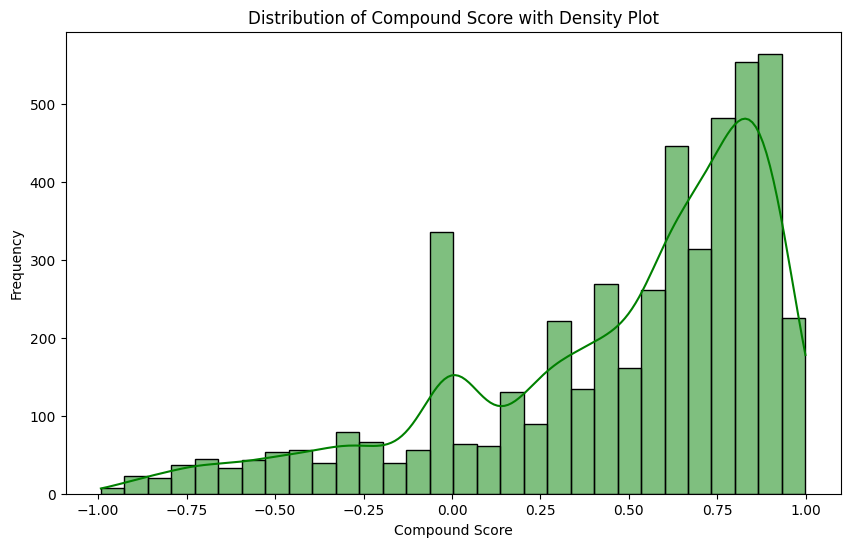

In [ ]:
# Distribution of compound scores with density plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the histogram with a density line for the compound score
sns.histplot(df['compound'], kde=True, bins=30, color='green', edgecolor='black')

# Add labels and title
plt.title('Distribution of Compound Score with Density Plot')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Distribution appears same as before.

In [ ]:
# Correlation between 'compound' and 'overall'
correlation = df['compound'].corr(df['overall'])

In [ ]:
print(f"The correlation between the compound score and the overall rating is: {correlation}")

The correlation between the compound score and the overall rating is: 0.3598429979836052


In [ ]:
# Correlation increased a little when getting rid of those words. However, it still indicates a positive
# weak relationship.

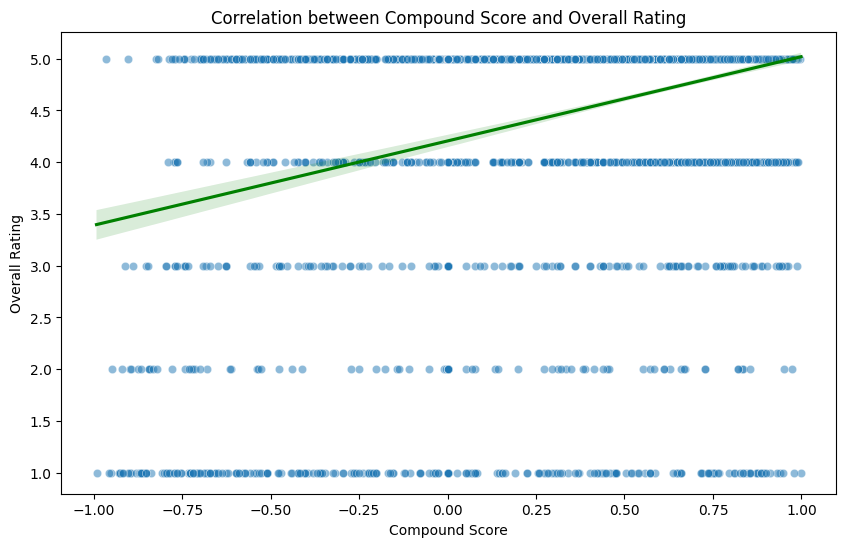

In [ ]:
# Plot correlation with new data
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='compound', y='overall', data=df, alpha=0.5)

# Add a line of best fit
sns.regplot(x='compound', y='overall', data=df, scatter=False, color='green')

# Add labels and title
plt.title('Correlation between Compound Score and Overall Rating')
plt.xlabel('Compound Score')
plt.ylabel('Overall Rating')

plt.show()


<ipython-input-45-b2f6c25efab2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall', y='compound', data=df, palette = 'viridis')


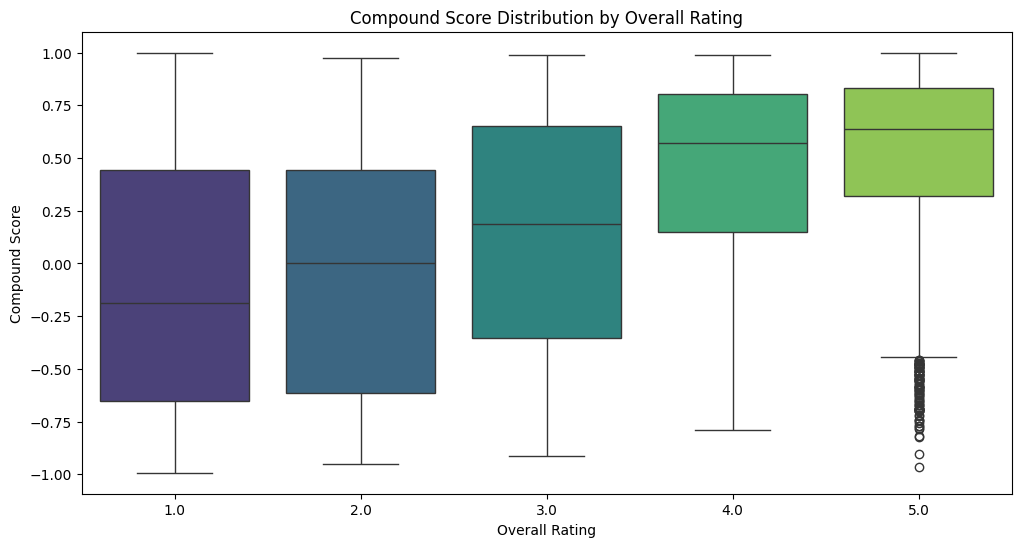

In [ ]:
# Above graph does not make much sense because overall (rating) is not a continuous variable.
# Boxplot of compound scores and overall rating with new data

# Set up the figure
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='overall', y='compound', data=df, palette = 'viridis')

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

plt.show()

In [ ]:
# The graph is similar to the one produced before removing the words. However, we notice a difference
# in the compound scores of 1 star ratings. Before, both 1 and 2 star ratings had neutral compound scores. Here,
# compound scores for 1 star products are negative. Also, there are no outliers for 4 star products.

<ipython-input-46-c82162ee1174>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='overall', y='compound', data=df, inner='box', palette= 'viridis')


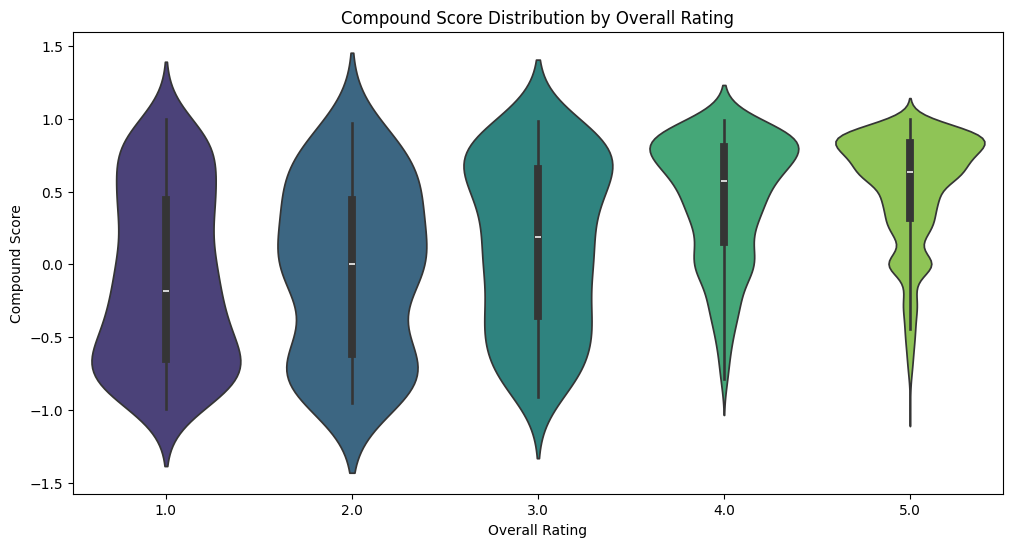

In [ ]:
# Violin plot with new data
# Set up the figure
plt.figure(figsize=(12, 6))

# Create a violin plot
sns.violinplot(x='overall', y='compound', data=df, inner='box', palette= 'viridis')

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

plt.show()

In [ ]:
# Similar to previous violin plot. The compound scores for 1 star ratings skewed more toward the negatives than
# netural as shown in the previous violin plot before removing words.

In [ ]:
pip install joypy

<Figure size 1200x800 with 0 Axes>

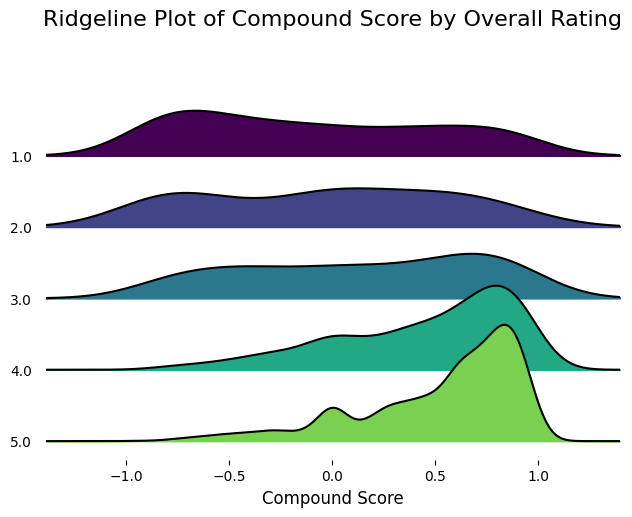

In [ ]:
# Ridge line with compound scores and overall ratings for new data
import pandas as pd
import matplotlib.pyplot as plt
import joypy

# Create the ridgeline plot
plt.figure(figsize=(12, 8))
joypy.joyplot(df, by='overall', column='compound', colormap=plt.cm.viridis)

# Set labels and the title
plt.xlabel('Compound Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Ridgeline Plot of Compound Score by Overall Rating', fontsize=16)

plt.show()

In [ ]:
# Same but distribution of compound scores for 1, 2, and 3 star products more skewed rather than
# evenly distributed.

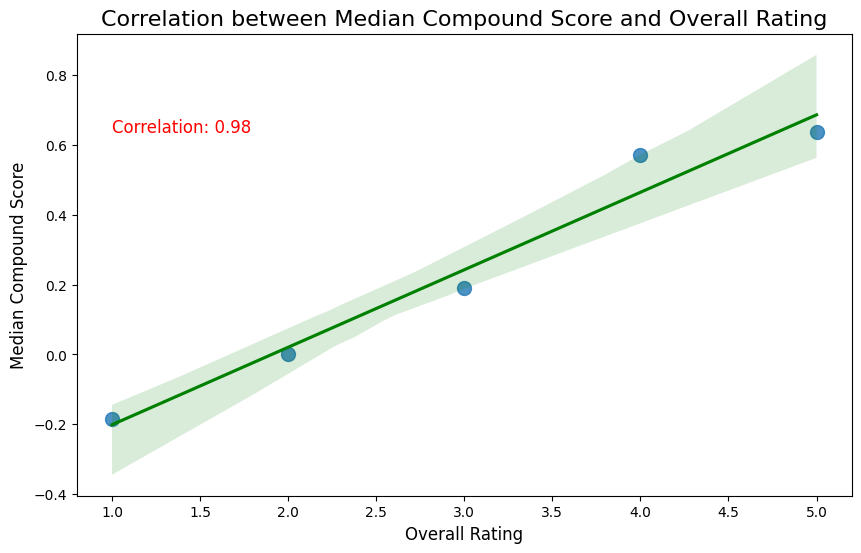

In [ ]:
# Median compound score and overall rating for new data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate the median compound score for each overall rating
median_scores = df.groupby('overall')['compound'].median().reset_index()

# Calculate the correlation coefficient between overall rating and median compound score
correlation, _ = pearsonr(median_scores['overall'], median_scores['compound'])

# Create the scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='overall', y='compound', data=median_scores, scatter_kws={'s': 100}, line_kws={"color": "green"})

# Add correlation value to the plot
plt.text(x=median_scores['overall'].min(),
         y=median_scores['compound'].max(),
         s=f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Add labels and title
plt.title('Correlation between Median Compound Score and Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Median Compound Score', fontsize=12)

plt.show()

In [ ]:
# Correlation coefficient increased by 0.01.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


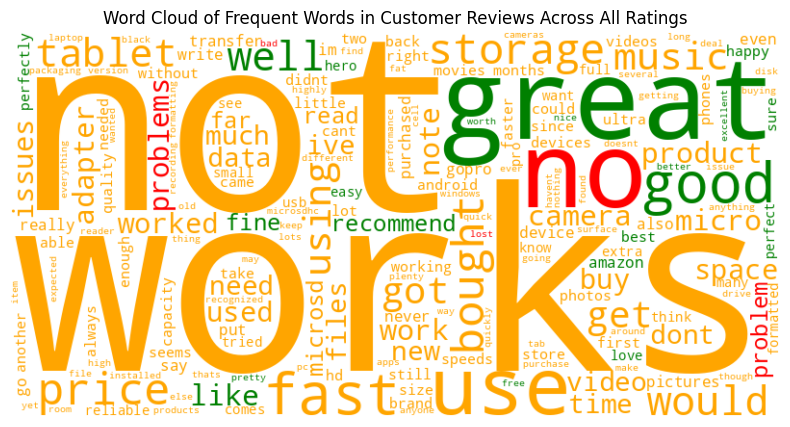

In [64]:
# Word cloud of frequent words across all ratings
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Ensure VADER is downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Combine all reviews into one list of words
all_words = []
for sentence in df['processed_reviewText'].dropna():
    words = nltk.word_tokenize(sentence)
    all_words.extend(words)

# Count frequency of each word
word_frequency = Counter(all_words)

# Calculate average sentiment scores for each unique word
sentiment_scores = {word: sid.polarity_scores(word)['compound'] for word in word_frequency.keys()}

# Create a function to categorize sentiment score
def get_color(sentiment_score):
    if sentiment_score > 0.1:
        return 'green'  # Positive
    elif sentiment_score < -0.1:
        return 'red'    # Negative
    else:
        return 'orange'   # Neutral

# Create a dictionary for the color mapping
word_colors = {word: get_color(score) for word, score in sentiment_scores.items()}

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: word_colors[word],
                      min_font_size=10).generate_from_frequencies(word_frequency)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Frequent Words in Customer Reviews Across All Ratings')
plt.show()




In [ ]:
# Size of words show how frequent a certain word was used in customer reviews. Bigger fonts indicate high
# frequency.
# Individual words were categorized into positive, neutral, or negative sentiment as shown by the different
# colors.
# On average, neutral words made up most of the customer reviews. Most frequent words that appear across all
# of the ratings are "works", "not", "no", "use", "good", "fast", and "great".

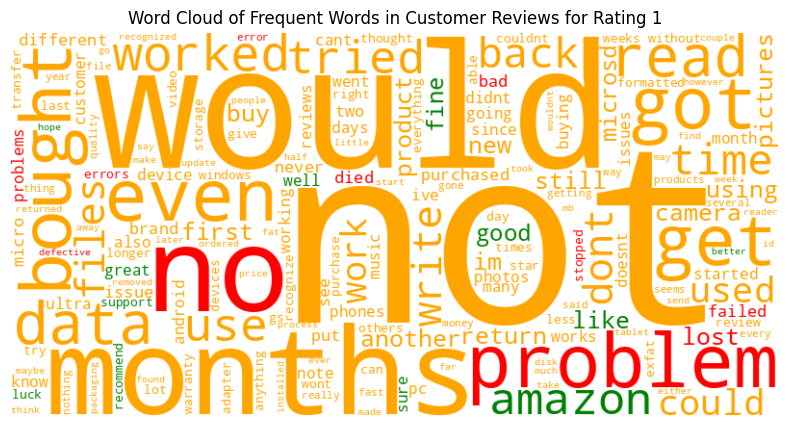

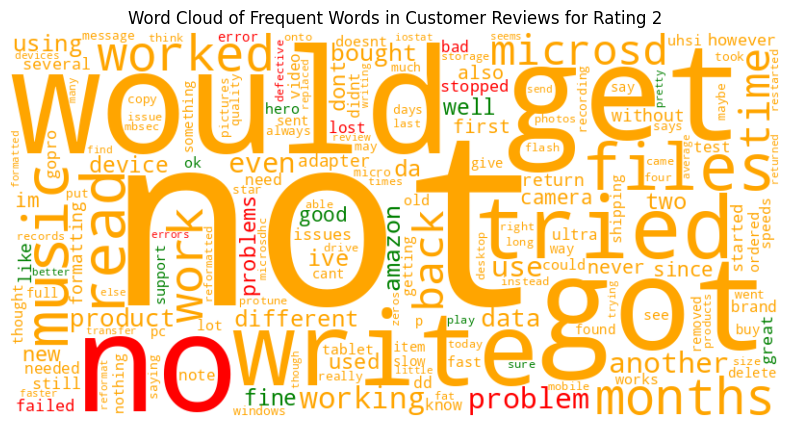

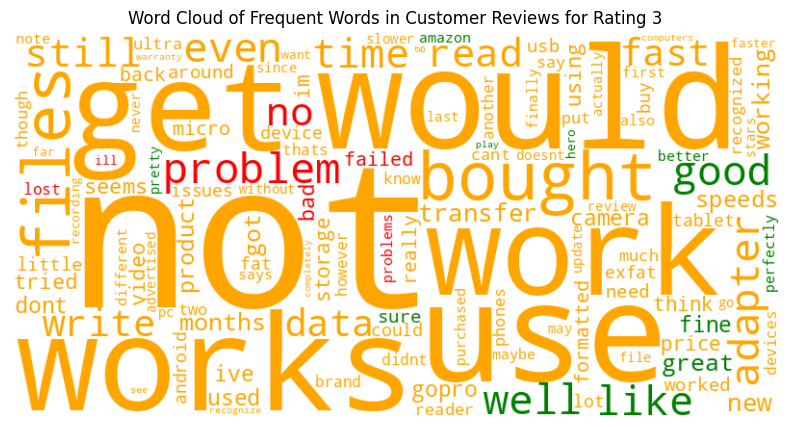

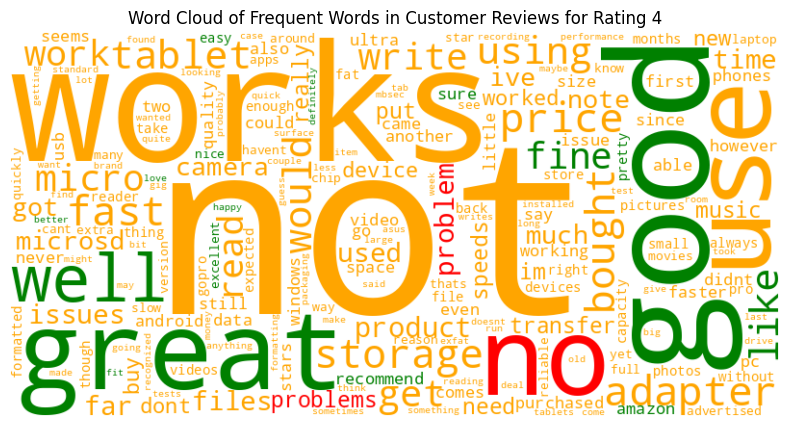

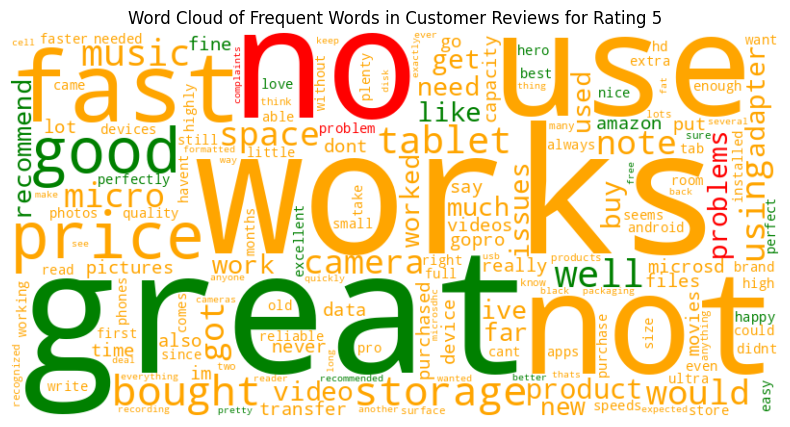

In [60]:
# Word cloud of frequent words by rating

sid = SentimentIntensityAnalyzer()

# Create a function to generate and plot word cloud for each rating
def generate_word_cloud_for_rating(df, rating):
    # Group reviews by rating
    reviews = df[df['overall'] == rating]['processed_reviewText'].dropna()

    # Combine all reviews for the specific rating into one list of words
    all_words = []
    for sentence in reviews:
        words = nltk.word_tokenize(sentence)
        all_words.extend(words)

    # Count the frequency of each word
    word_frequency = Counter(all_words)

    # Calculate average sentiment scores for each unique word
    sentiment_scores = {word: sid.polarity_scores(word)['compound'] for word in word_frequency.keys()}

    # Assign colors based on sentiment score
    def get_color(sentiment_score):
        if sentiment_score > 0.1:
            return 'green'  # Positive
        elif sentiment_score < -0.1:
            return 'red'    # Negative
        else:
            return 'orange'   # Neutral

    # Create a dictionary for the color mapping
    word_colors = {word: get_color(score) for word, score in sentiment_scores.items()}

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: word_colors[word],
                          min_font_size=10).generate_from_frequencies(word_frequency)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f'Word Cloud of Frequent Words in Customer Reviews for Rating {rating}')

    plt.show()

# Iterate through each rating from 1 to 5 and generate a word cloud
for rating in range(1, 6):
    generate_word_cloud_for_rating(df, rating)


In [ ]:
# Above word plots show the frequency and sentiments of words in each rating (1-5). For products with ratings of
# 1,2, and 3 stars, most of the words are of neutral sentiment. However, negative words such as "problem" or
# "no" also appears somewhat frequent in 1 and 2 star ratings. We see higher freuquency of positive words (in
# green) for ratings of 4 and 5 stars. From this, we can interpret that certain words may have influence on
# ratings. For example, positive words like "great","good","well" may have correlation with higher ratings.
# However, we also see words such as "no" that are also freuquent in 5 stars, meaning there are outliers.


In [61]:
# Top 10 most frequent words
from collections import Counter

# Function to get top 10 words for a given list of reviews
def get_top_words(reviews):
    # Flatten the list of strings into a single list of words
    all_words = ' '.join(reviews).split()
    # Count the word frequencies
    word_freq = Counter(all_words)
    # Get the 10 most common words
    return word_freq.most_common(10)

# Get the top 10 words for each overall rating
top_words_by_rating = {}
for rating in sorted(df['overall'].unique()):
    reviews = df[df['overall'] == rating]['processed_reviewText'].dropna()
    top_words_by_rating[rating] = get_top_words(reviews)

print("Top 10 most frequent words for each overall rating:")
for rating, words in top_words_by_rating.items():
    print(f"Rating {rating}: {words}")


Top 10 most frequent words for each overall rating:
Rating 1.0: [('not', 238), ('would', 95), ('months', 81), ('no', 80), ('problem', 76), ('even', 73), ('bought', 71), ('got', 71), ('get', 70), ('data', 68)]
Rating 2.0: [('not', 83), ('would', 37), ('no', 32), ('get', 31), ('got', 29), ('write', 26), ('tried', 25), ('files', 25), ('music', 23), ('read', 22)]
Rating 3.0: [('not', 102), ('would', 39), ('use', 38), ('works', 35), ('get', 31), ('work', 30), ('bought', 27), ('files', 26), ('problem', 26), ('adapter', 25)]
Rating 4.0: [('not', 227), ('works', 181), ('good', 135), ('great', 131), ('no', 128), ('use', 127), ('well', 92), ('adapter', 87), ('fast', 86), ('price', 86)]
Rating 5.0: [('works', 1307), ('great', 1257), ('no', 998), ('use', 868), ('not', 801), ('fast', 775), ('price', 722), ('good', 680), ('bought', 638), ('storage', 633)]


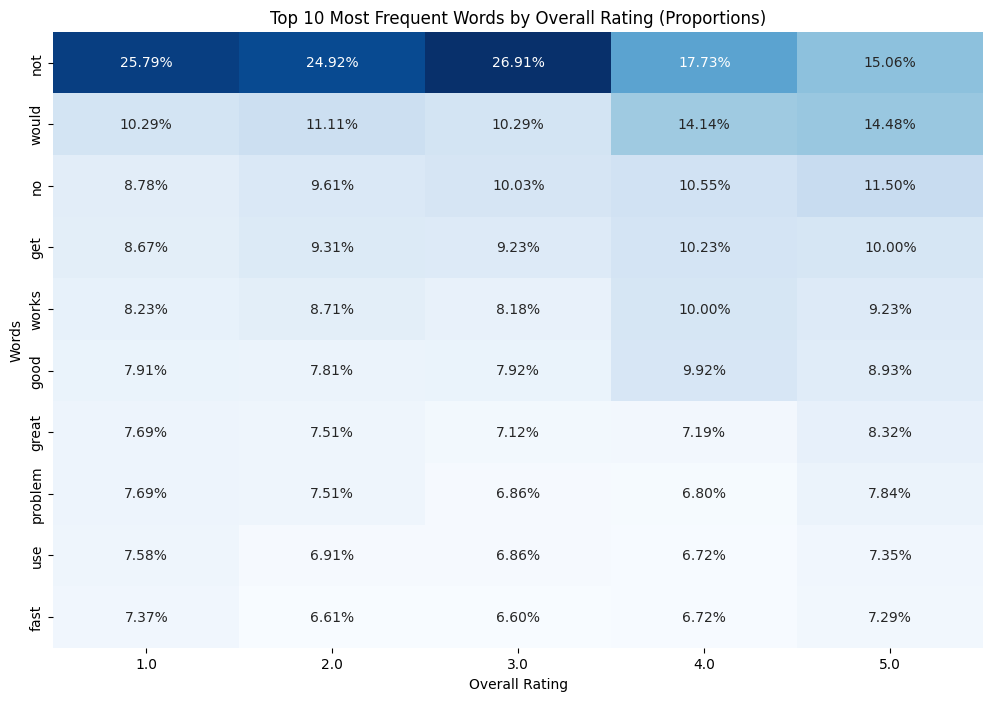

In [ ]:
# Heatmap of 10 most frequent words by overall rating - proportions

# Create DataFrame for the heatmap with normalized values
data = {
    '1.0': [238, 95, 81, 80, 76, 73, 71, 71, 70, 68],
    '2.0': [83, 37, 32, 31, 29, 26, 25, 25, 23, 22],
    '3.0': [102, 39, 38, 35, 31, 30, 27, 26, 26, 25],
    '4.0': [227, 181, 135, 131, 128, 127, 92, 87, 86, 86],
    '5.0': [1307, 1257, 998, 868, 801, 775, 722, 680, 638, 633]
}
index = ['not', 'would', 'no', 'get', 'works', 'good', 'great', 'problem', 'use', 'fast']

df_heatmap = pd.DataFrame(data, index=index)

# Calculate the total counts for each rating
rating_totals = df_heatmap.sum(axis=0)

# Normalize the counts to get proportions
df_normalized = df_heatmap.divide(rating_totals, axis=1)

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_normalized, annot=True, cmap='Blues', fmt='.2%', cbar=False)
plt.title('Top 10 Most Frequent Words by Overall Rating (Proportions)')
plt.xlabel('Overall Rating')
plt.ylabel('Words')

plt.show()


In [ ]:
# Neutral words like "not" and "works" seem to be the most frequent across all ratings. Words like
# "great" and "good" appear more frequently as ratings increase, as proved from our word plots. Also,
# words like "no" also appear to increase, suggesting some correlation between words and overall rating.

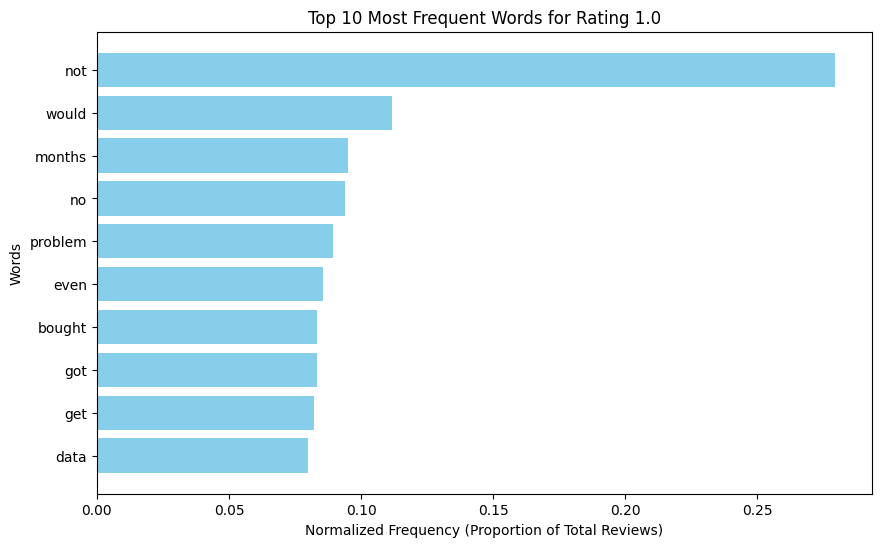

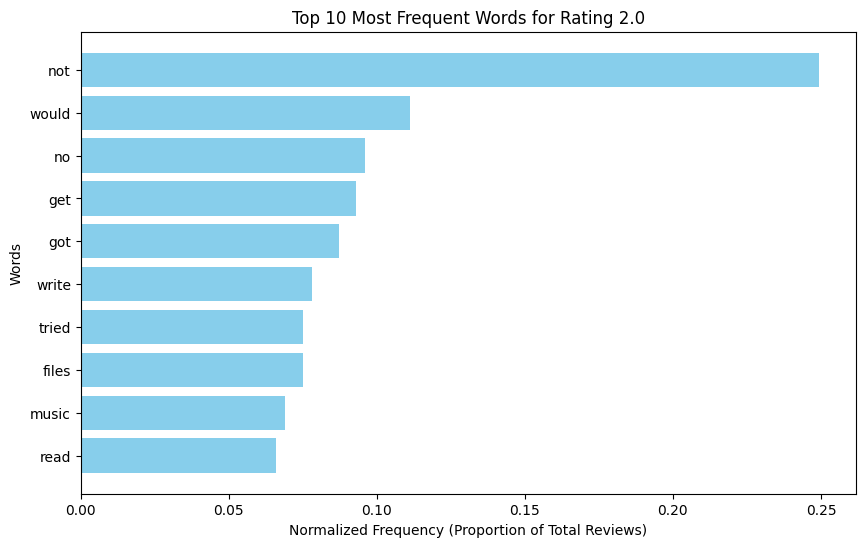

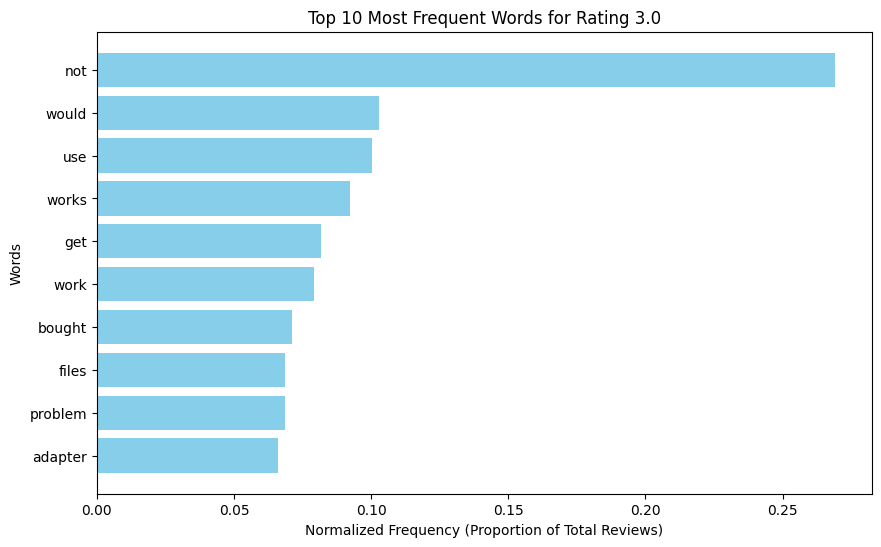

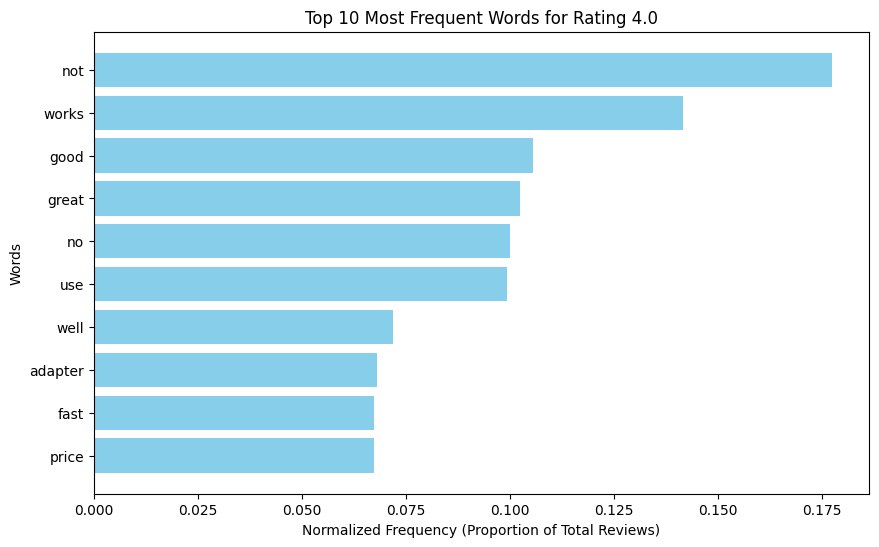

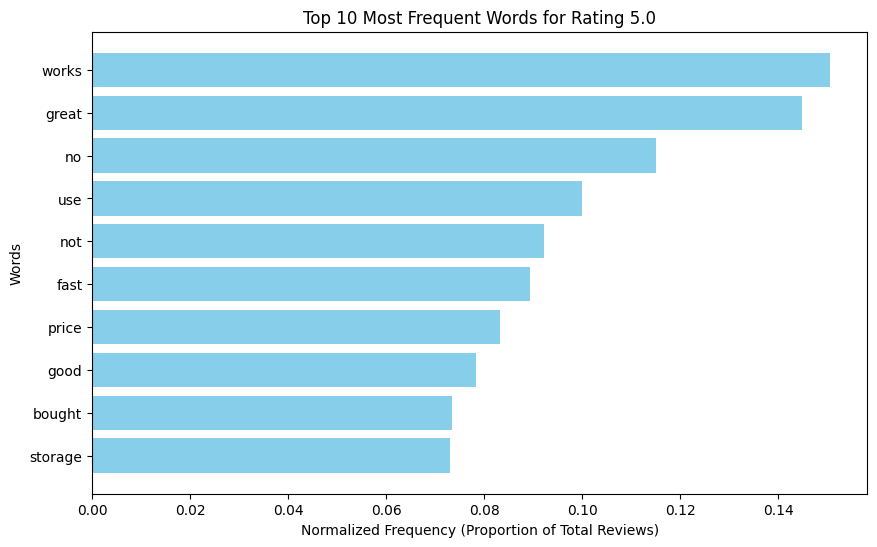

In [ ]:

# Proportions of top 10 most frequent words broken down by overall rating. This allows us to capture words that
# might not have been included in the heatmap.
# Data for top 10 most frequent words for each overall rating
frequent_words = {
    1.0: [('not', 238), ('would', 95), ('months', 81), ('no', 80), ('problem', 76), ('even', 73), ('bought', 71), ('got', 71), ('get', 70), ('data', 68)],
    2.0: [('not', 83), ('would', 37), ('no', 32), ('get', 31), ('got', 29), ('write', 26), ('tried', 25), ('files', 25), ('music', 23), ('read', 22)],
    3.0: [('not', 102), ('would', 39), ('use', 38), ('works', 35), ('get', 31), ('work', 30), ('bought', 27), ('files', 26), ('problem', 26), ('adapter', 25)],
    4.0: [('not', 227), ('works', 181), ('good', 135), ('great', 131), ('no', 128), ('use', 127), ('well', 92), ('adapter', 87), ('fast', 86), ('price', 86)],
    5.0: [('works', 1307), ('great', 1257), ('no', 998), ('use', 868), ('not', 801), ('fast', 775), ('price', 722), ('good', 680), ('bought', 638), ('storage', 633)]
}

# Total number of reviews for each rating
total_reviews = {
    1.0: 238 + 95 + 81 + 80 + 76  + 73 + 71 + 70 + 68,
    2.0: 83 + 37 + 32 + 31 + 29 + 26 + 25 + 25 + 23 + 22,
    3.0: 102 + 39 + 38 + 35 + 31 + 30 + 27 + 26 + 26 + 25,
    4.0: 227 + 181 + 135 + 131 + 128 + 127 + 92 + 87 + 86 +86,
    5.0: 1307 + 1257 + 998 + 868 + 801 + 775 + 722 + 680 + 638 + 633
}

# Plot normalized bar charts
for rating, words in frequent_words.items():
    words, counts = zip(*words)

    # Normalize counts by dividing by the total number of reviews for that rating
    normalized_counts = [count / total_reviews[rating] for count in counts]

    plt.figure(figsize=(10, 6))
    plt.barh(words, normalized_counts, color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
    plt.title(f'Top 10 Most Frequent Words for Rating {rating}')
    plt.xlabel('Normalized Frequency (Proportion of Total Reviews)')
    plt.ylabel('Words')
    plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

# Define thresholds for extreme scores
positive_threshold = 0.8  # Adjust this to your preference for extreme positivity
negative_threshold = -0.8  # Adjust this to your preference for extreme negativity

# Filter for extremely positive reviews
extremely_positive_reviews = df[(df['compound'] >= positive_threshold)][['reviewText', 'processed_reviewText', 'overall', 'compound']]

# Filter for extremely negative reviews
extremely_negative_reviews = df[(df['compound'] <= negative_threshold)][['reviewText', 'processed_reviewText', 'overall', 'compound']]

# Display the results in a table format
print("Extremely Positive Reviews:")
display(extremely_positive_reviews)

print("\nExtremely Negative Reviews:")
display(extremely_negative_reviews)

Extremely Positive Reviews:


,reviewText,processed_reviewText,overall,compound
6,I have it in my phone and it never skips a bea...,never skips beat file transfers speedy not cor...,5.0,0.8971
7,It's hard to believe how affordable digital ha...,hard believe affordable digital become device ...,5.0,0.8221
10,I like this SD Card because it can take music ...,like take music video downloads personal video...,5.0,0.9169
16,got this because i had a 2 GB one that filled ...,got filled kept getting insufficient disk spac...,5.0,0.8316
17,Class 10 Speed Rating for Seamless Full HD Vid...,rating seamless full hd videothe ultra uhsi fe...,5.0,0.8984
...,...,...,...,...
4889,Works just fine in my video camera in the car....,works fine video camera car saved bucks best b...,5.0,0.8316
4892,"Hello,Great card, great price. Plenty of speed...",hellogreat great price plenty worked forabout ...,1.0,0.9485
4896,I use it to hold files from my computer and tr...,use hold files transfer files computers works ...,5.0,0.8047
4900,SO I recently got a new Chinese brand Android ...,recently got new chinese brand android inew qu...,5.0,0.9742



Extremely Negative Reviews:


,reviewText,processed_reviewText,overall,compound
137,"Appears to be Class 10, holds about as much as...",appears holds much says came adapter even gave...,5.0,-0.9042
213,"Having used SanDisk before in my photography, ...",used photography course went time outfit new s...,1.0,-0.9251
296,Thus microSD card worked fine for a year in my...,thus microsd worked fine year samsumg note ii ...,2.0,-0.8979
355,I join the long list of customers who have had...,join long list customers die customer service ...,3.0,-0.8519
512,This card failed after 2 weeks of use. I have...,failed weeks use problem ssd failed months,1.0,-0.8519
615,Bought 2 of these for the wife's & my Android ...,bought wifes android failed months figured luc...,1.0,-0.9923
821,"Do not buy, card failed on the third usage. K...",not buy failed third usage kicker not favoris ...,1.0,-0.8959
874,I've tried other cards going back to when Comp...,ive tried going back compact flash ruled every...,5.0,-0.8231
1176,i still own it but card went bad after 2 weeks...,still went bad weeks owning lost tons music da...,1.0,-0.9260
1188,Doesn't work in my s2 skyrocket but works in m...,doesnt work skyrocket works xoom odd suffer se...,3.0,-0.8885
